# Importing dependencies and libraries

In [75]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics

# Loading and gain info about the dataset

In [76]:
df=pd.read_csv(r'taxi_trip_pricing.csv')
df.head(5)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [77]:
df.dtypes

Trip_Distance_km         float64
Time_of_Day               object
Day_of_Week               object
Passenger_Count          float64
Traffic_Conditions        object
Weather                   object
Base_Fare                float64
Per_Km_Rate              float64
Per_Minute_Rate          float64
Trip_Duration_Minutes    float64
Trip_Price               float64
dtype: object

In [78]:
df.shape

(1000, 11)

In [79]:
df.describe()


,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [80]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

# Handling missing values

In [81]:

float_cols = df.select_dtypes(include=['float']).columns
float_data = df[float_cols]
print(float_data)

     Trip_Distance_km  Passenger_Count  Base_Fare  Per_Km_Rate  \
0               19.35              3.0       3.56         0.80   
1               47.59              1.0        NaN         0.62   
2               36.87              1.0       2.70         1.21   
3               30.33              4.0       3.48         0.51   
4                 NaN              3.0       2.93         0.63   
..                ...              ...        ...          ...   
995              5.49              4.0       2.39         0.62   
996             45.95              4.0       3.12         0.61   
997              7.70              3.0       2.08         1.78   
998             47.56              1.0       2.67         0.82   
999             22.85              3.0       4.34          NaN   

     Per_Minute_Rate  Trip_Duration_Minutes  Trip_Price  
0               0.32                  53.82     36.2624  
1               0.43                  40.57         NaN  
2               0.15             

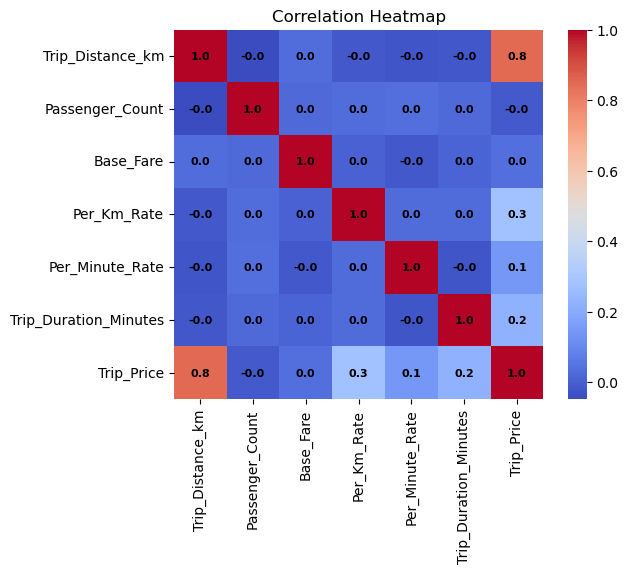

In [82]:
corre=float_data.corr()
cor=sns.heatmap(corre,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={'size':8,'color':'black','weight':'bold'},cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [83]:
from sklearn.impute import SimpleImputer
imputer=imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
float_data=(imputer.fit_transform(float_data)).round(2)
float_data = pd.DataFrame(float_data, columns=float_cols)
print(float_data)
print(float_data.dtypes)

     Trip_Distance_km  Passenger_Count  Base_Fare  Per_Km_Rate  \
0               19.35              3.0       3.56         0.80   
1               47.59              1.0       3.50         0.62   
2               36.87              1.0       2.70         1.21   
3               30.33              4.0       3.48         0.51   
4               27.07              3.0       2.93         0.63   
..                ...              ...        ...          ...   
995              5.49              4.0       2.39         0.62   
996             45.95              4.0       3.12         0.61   
997              7.70              3.0       2.08         1.78   
998             47.56              1.0       2.67         0.82   
999             22.85              3.0       4.34         1.23   

     Per_Minute_Rate  Trip_Duration_Minutes  Trip_Price  
0               0.32                  53.82       36.26  
1               0.43                  40.57       56.87  
2               0.15             

I just ignored the object or string columns (Time_of_Day, Day_of_Week, Traffic_Conditions, Weather) as they do not significantly influence the prediction of km and price. This decision was based on dimensionality reduction principles to exclude less relevant features and focus on impactful ones for the prediction model. 

## after handling missing values


In [84]:
float_data.isna().sum()

Trip_Distance_km         0
Passenger_Count          0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

# checking and remove outliers

In [85]:
float_data.shape

(1000, 7)

## perform EDA to check outliers present in which column

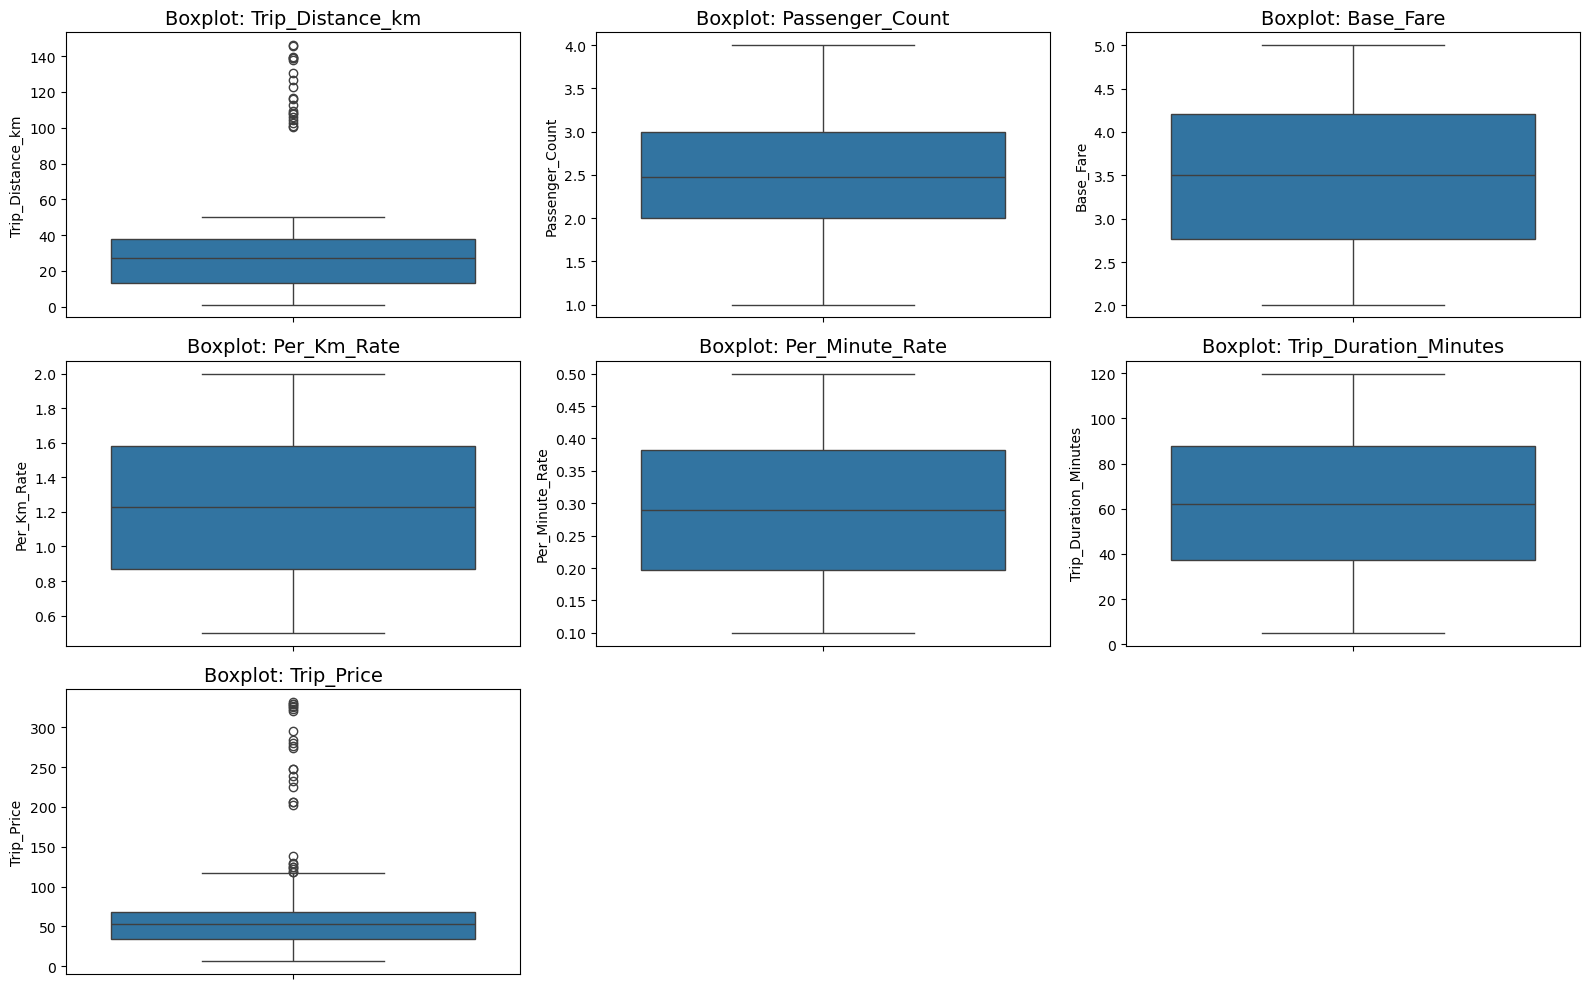

In [86]:
plt.figure(figsize=(16, 10))
for i, column in enumerate(float_data.columns, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(y=float_data[column])
    plt.title(f"Boxplot: {column}", fontsize=14)
    plt.tight_layout()
    

plt.show()

In [87]:
outlier_data = float_data[['Trip_Distance_km', 'Trip_Price']]
outlier_df=pd.DataFrame(outlier_data)

Text(0, 0.5, 'Values')

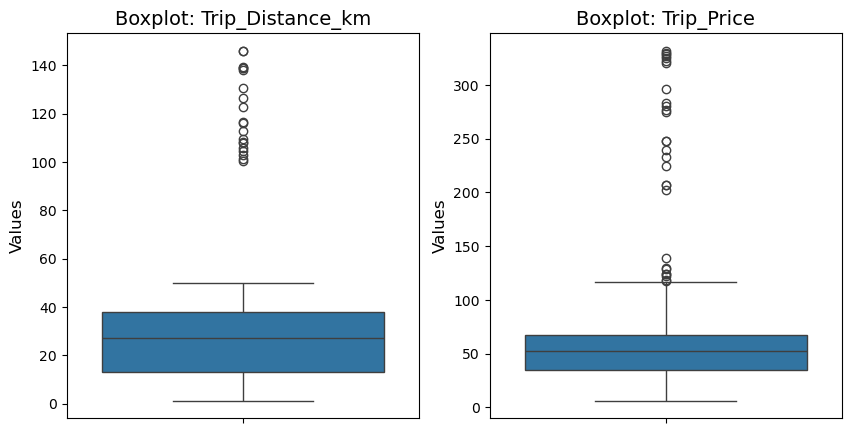

In [88]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=float_data['Trip_Distance_km'])
plt.title("Boxplot: Trip_Distance_km", fontsize=14)
plt.ylabel("Values", fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(y=float_data['Trip_Price'])
plt.title("Boxplot: Trip_Price", fontsize=14)
plt.ylabel("Values",fontsize=12)

### outliers remove for trip distance

In [89]:
def remove_outliers(data, column):
    """
    Removes outliers from a specified column in the DataFrame using the IQR method.

    Parameters:
    data (pd.DataFrame): The input DataFrame.
    column (str): The name of the column for which to remove outliers.

    Returns:
    pd.DataFrame: A DataFrame with outliers removed for the specified column.
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

print("Shape before removing outliers from Trip_Distance_km:", float_data.shape)
filtered_data = remove_outliers(float_data, 'Trip_Distance_km')
filtered_data_1 = remove_outliers(filtered_data, 'Trip_Price')

print("Shape after removing outliers from Trip_Distance_km:", filtered_data.shape)
print("Shape after removing outliers from Trip_Price:", filtered_data_1.shape)


Shape before removing outliers from Trip_Distance_km: (1000, 7)
Shape after removing outliers from Trip_Distance_km: (980, 7)
Shape after removing outliers from Trip_Price: (970, 7)


In [ ]:
Q1=float_data['Trip_Distance_km'].quantile(0.25)
Q3=float_data['Trip_Distance_km'].quantile(0.75)
IQR=Q3-Q1 

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data=float_data[(float_data['Trip_Distance_km']>=lower_bound) & (float_data['Trip_Distance_km']<=upper_bound)]
filtered_data.shape

### Outliers remove for trip price

In [ ]:
Q1=filtered_data['Trip_Price'].quantile(0.25)
Q3=filtered_data['Trip_Price'].quantile(0.75)
IQR=Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data_1=filtered_data[(filtered_data['Trip_Price']>=lower_bound) & (filtered_data['Trip_Price']<=upper_bound)]
filtered_data_1.shape

### visual treat after remove outliers

Text(0, 0.5, 'Values')

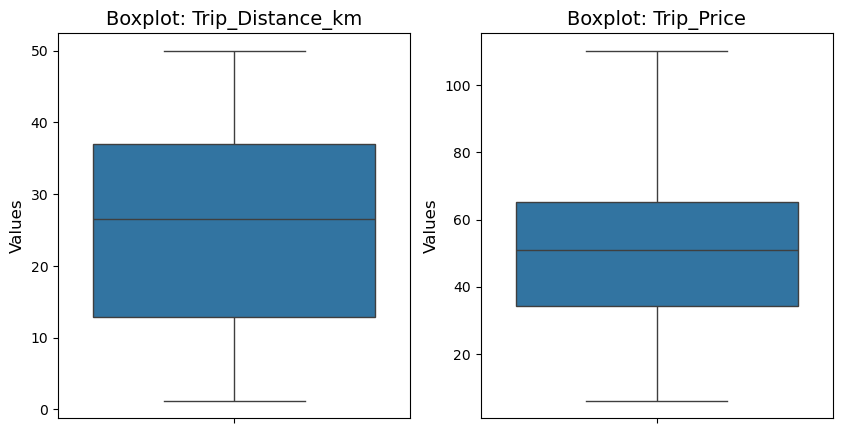

In [101]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=filtered_data['Trip_Distance_km'])
plt.title("Boxplot: Trip_Distance_km", fontsize=14)
plt.ylabel("Values", fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(y=filtered_data_1['Trip_Price'])
plt.title("Boxplot: Trip_Price", fontsize=14)
plt.ylabel("Values",fontsize=12)

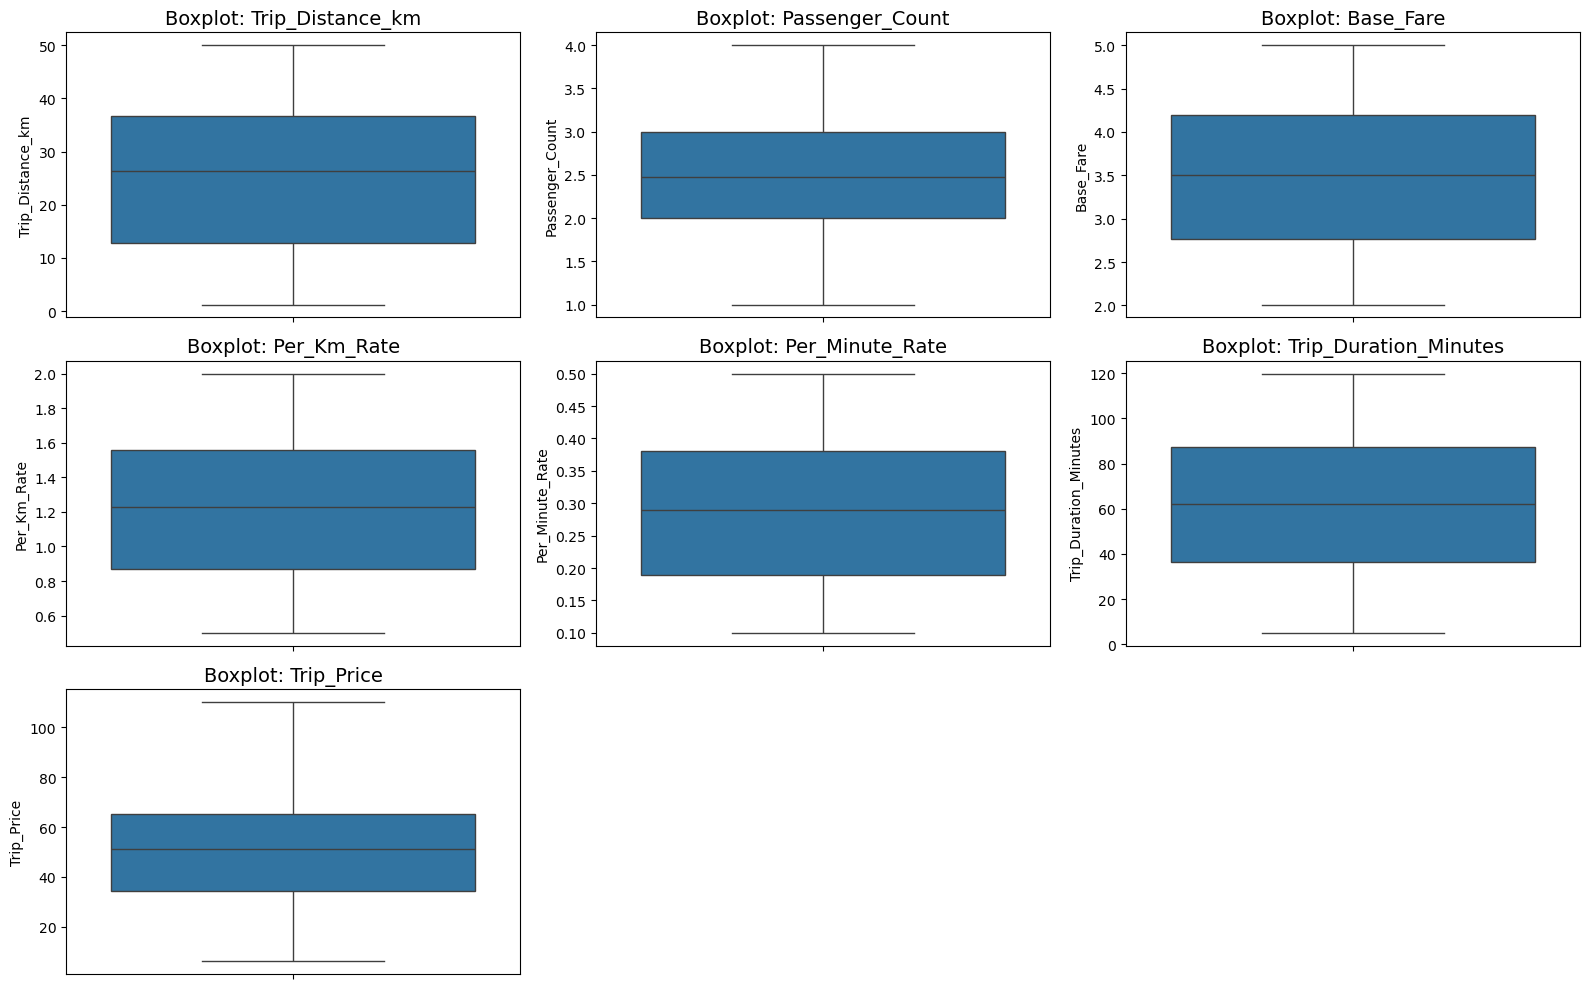

In [102]:
plt.figure(figsize=(16, 10))
for i, column in enumerate(filtered_data_1.columns, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(y=filtered_data_1[column])
    plt.title(f"Boxplot: {column}", fontsize=14)
    plt.tight_layout()
    

plt.show()

# feature scaling

In [93]:
scaler=StandardScaler()

In [94]:
x=filtered_data_1.drop(columns=['Trip_Price'],axis=1)
y=filtered_data_1['Trip_Price']
print(y.min())
print(y.max())
print(x)

6.13
110.25
     Trip_Distance_km  Passenger_Count  Base_Fare  Per_Km_Rate  \
0               19.35              3.0       3.56         0.80   
1               47.59              1.0       3.50         0.62   
2               36.87              1.0       2.70         1.21   
3               30.33              4.0       3.48         0.51   
4               27.07              3.0       2.93         0.63   
..                ...              ...        ...          ...   
995              5.49              4.0       2.39         0.62   
996             45.95              4.0       3.12         0.61   
997              7.70              3.0       2.08         1.78   
998             47.56              1.0       2.67         0.82   
999             22.85              3.0       4.34         1.23   

     Per_Minute_Rate  Trip_Duration_Minutes  
0               0.32                  53.82  
1               0.43                  40.57  
2               0.15                  37.27  
3          

# splitting the filtered dataset

In [95]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Model training

In [96]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

model = LinearRegression()
model.fit(x_train_poly, y_train)

y_pred = model.predict(x_test_poly)
r2 = r2_score(y_test, y_pred)
print(r2)


0.9212718603802493


# visualize the prediction values


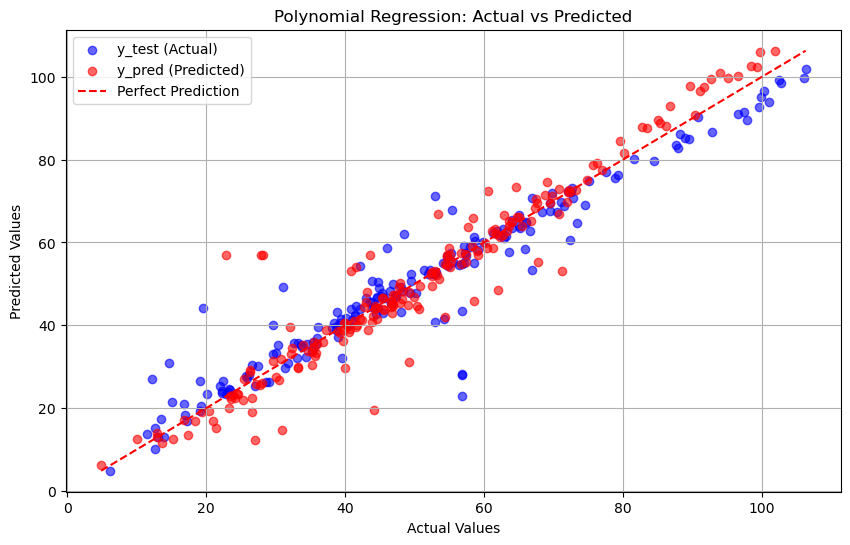

In [103]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='y_test (Actual)')
plt.scatter(y_pred, y_test, color='red', alpha=0.6, label='y_pred (Predicted)')


min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')


plt.title('Polynomial Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# improve the model try another algorithm

In [98]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
regressor.fit(x, y)
result=print(regressor.score(x_test, y_test))
print(result)

0.9748321002831433
None


c:\Users\gowth\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [99]:
import pickle

with open('regressor.pkl', 'wb') as file:
    pickle.dump(regressor, file)
print("Model saved as regressor.pkl")

Model saved as regressor.pkl


# Try another algorithm

In [100]:
from lightgbm import LGBMRegressor

lgbm=LGBMRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)
lgbm.fit(x, y)
y_pred_lgbm=lgbm.predict(x_test)

print("r2_score:",r2_score(y_test, y_pred_lgbm))
print("mean_absolute_error:",mean_absolute_error(y_test, y_pred_lgbm))
print("mean_squared_error:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_lgbm)))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 970, number of used features: 6
[LightGBM] [Info] Start training from score 51.683588
r2_score: 0.9999936671082637
mean_absolute_error: 0.035900328130839744
mean_squared_error: 0.05629362258388332
